In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data

In [158]:
## CONSTANTS
R = 8.31
cp = 0.846

In [56]:
## VOLTMETR (4)
delta_volt = 0.003 # mkV

In [57]:
## MANOMETR (5)
delta = 0.1 #bar
lim = 6 

In [58]:
## DELTA P = 4 atm (7)
V = 0

In [59]:
## P down (from 1.5 to 4 atm) with T = Troom = const (8)
vs = np.array([])
ps = np.array([])

In [63]:
emu1 = [((delta /ps1[i])**2 + (delta_volt/vs1[i])**2)**0.5 for i in range(len(Ts))]

emu2 = [((delta /ps1[i])**2 + (delta_volt/vs2[i])**2)**0.5 for i in range(len(Ts))]
emu3 = [((delta /ps1[i])**2 + (delta_volt/vs3[i])**2)**0.5 for i in range(len(Ts))]
emu4 = [((delta /ps1[i])**2 + (delta_volt/vs4[i])**2)**0.5 for i in range(len(Ts))]

In [64]:
delta /ps1[1], delta_volt/vs1[1]

(0.028571428571428574, -0.02247191011235955)

In [67]:
emu1, emu2, emu3, emu4

([0.03142947329153354,
  0.03634987310445818,
  0.04299065894317241,
  0.05195062613612478],
 [0.03181183339397546,
  0.036896834794019916,
  0.04283730590714478,
  0.052683111184530784],
 [0.03318181818181819,
  0.0395845475044498,
  0.04727231271367714,
  0.05979388465366093],
 [0.03708921501622537,
  0.04624543847990872,
  0.058438952002163,
  0.07711874642781581])

In [164]:
dt1 = [delta_volt/v for v in vs1]
dt2 = [delta_volt/v for v in vs2]
dt3 = [delta_volt/v for v in vs3]
dt4 = [delta_volt/v for v in vs4]

In [165]:
max(dt1), max(dt2), max(dt3), max(dt4)

(0.05714285714285715,
 0.06593406593406594,
 0.08695652173913043,
 0.14634146341463414)

In [166]:
## T(P) FOR T IN RANGE 30-70
Ts = [23.2, 30, 40, 50]

vs1 = np.array([0.1575, 0.1335, 0.1105, 0.0905, 0.0675, 0.0525]) #milivolts
ts1 = np.array([x*1000/40.7 for x in vs1]) #celscius
ps1 = np.array([4, 3.5, 3.0, 2.5, 2.0, 1.5])

vs2 = np.array([0.1525, 0.1285, 0.1115, 0.0875, 0.0635, 0.0455])
ts2 = [i*1000/41.1 for i in vs2]
ps2 = ps1

vs3 = np.array([0.1375, 0.1095, 0.0895, 0.0675, 0.0465, 0.0345])
ts3 = [i *1000/41.9 for i in vs3]

vs4 = np.array([0.1095, 0.0825, 0.0625, 0.0455, 0.0305, 0.0205])
ts4 = [i*1000/42.8 for i in vs4]

In [167]:
[round(t1, 2) for t1 in ts4]

[2.56, 1.93, 1.46, 1.06, 0.71, 0.48]

## PLOT (10)

In [176]:
x = ps1
y = ts1
dy = [0.1463]*len(ps1)
dx = [delta for x in range(len(x))]

 
1.043 x - 0.3626


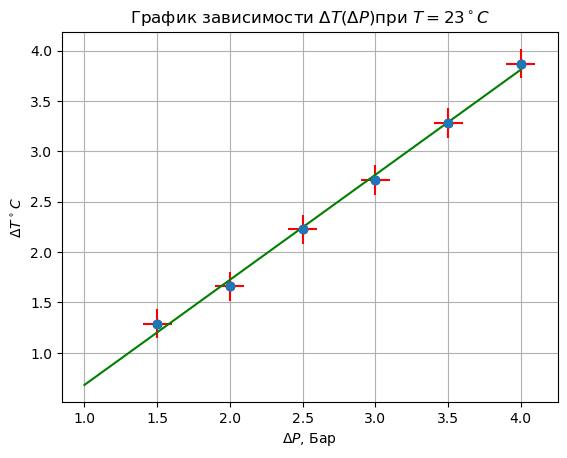

In [177]:
fig, ax = plt.subplots()
plt.errorbar(x, y, xerr=dx, yerr=dy, fmt='o', ecolor='red')
plt.scatter(x, y, color="blue")
ax.set_title('График зависимости $\Delta T(\Delta P)$при $T = 23^\circ C$')
plt.grid()


model1 = np.poly1d(np.polyfit(x, y, 1))
polyline = np.linspace(1, 4)
plt.plot(polyline, model1(polyline), color = 'green')
plt.xlabel('$\Delta P$, Бар')
plt.ylabel('$\Delta T^\circ C$')

print(model1)

plt.savefig('plot4.png')

## PLOT (11)

In [151]:
mus = np.array([1.043, 1.048, 0.9901, 0.8251 ]) # cels/bar ci *10**5
oneT = np.array([10000/(x+273) for x in Ts])
#mus = [m*10**5 for m in mus]

In [181]:
x = oneT
y = mus
y2 = [1.105 ,1.03, 0.958, 0.898] 

dx = [(0.146/(Ts[i]+273))*oneT[i] for i in range(len(Ts))]
dy = [max(emu1)*abs(mus[0]), max(emu2)*abs(mus[1]), max(emu3)*abs(mus[2]), max(emu4)*abs(mus[3])]

In [182]:
dy

[0.05418450305997814,
 0.05521190052138827,
 0.059201925195589686,
 0.06363067767759083]

In [183]:
dx

[0.016641127475139753,
 0.015902580357045604,
 0.0149026732946136,
 0.013994191452041137]

 
0.07691 x - 1.517


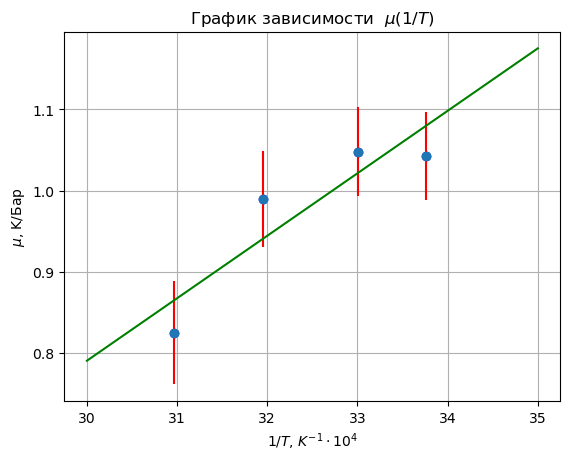

In [184]:
fig, ax = plt.subplots()
plt.errorbar(x, y, yerr=dy, xerr=dx, fmt='o', ecolor='red')
plt.scatter(x, y, color="blue")
ax.set_title('График зависимости  $\mu (1/T)$')
plt.grid()
#plt.scatter(x, y2, color="pink")

model1 = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y2, 1))
polyline = np.linspace(30, 35)
plt.plot(polyline, model1(polyline), color = 'green')
#plt.plot(polyline, model2(polyline), color = 'purple')

plt.xlabel('$ 1/T$, $K^{-1}\cdot 10^4$')
plt.ylabel('$\mu$, K/Бар')
print(model1)


plt.savefig('TableValue.png')

In [159]:
b = cp*(1.517) # 10^(-5)
a = cp * R * 0.5 * (0.07691)*0.1
Tinv = (2*a/(R * b))

In [161]:
b, a, Tinv, (2*0.36)/(R*4.28)

(1.2833819999999998,
 0.027034864830000005,
 0.0050698747528015835,
 0.020243597962144467)

In [162]:
12.8*0.077

0.9856

In [178]:
0.027*((0.1463**2 + 0.077**2)**0.5)

0.00446380230409009

In [179]:
0.004/0.027

0.14814814814814814

In [180]:
507*((0.148**2 + 0.077**2)**0.5)

84.58395129692155